In [28]:
%matplotlib widget

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob

import seaborn as sns
mako = sns.color_palette("mako", as_cmap=True)

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150
plt.ioff()

In [30]:
data = {} # data[L, p] contains (fail_rate, density)
for f in glob.glob('data/run_3/run_3_*_*.npy'):
    L = int(f.split("_")[3])
    p = int(f.split("_")[4].split(".")[1])
    data[L, p] = np.load(f)

data[160, 3] = np.array([np.NaN, np.NaN])
data[160, 4] = np.array([np.NaN, np.NaN])
data[160, 5] = np.array([np.NaN, np.NaN])
data[180, 2] = np.array([np.NaN, np.NaN])
data[180, 3] = np.array([np.NaN, np.NaN])
data[180, 4] = np.array([np.NaN, np.NaN])
data[180, 5] = np.array([np.NaN, np.NaN])

In [31]:
plotting_array = np.zeros((9, 5, 2))
for L, p in data:
    plotting_array[L//20-1,p-1,:] = data[L, p]

In [32]:
fail_rate = plotting_array[:,:,0]
density = plotting_array[:,:,1]

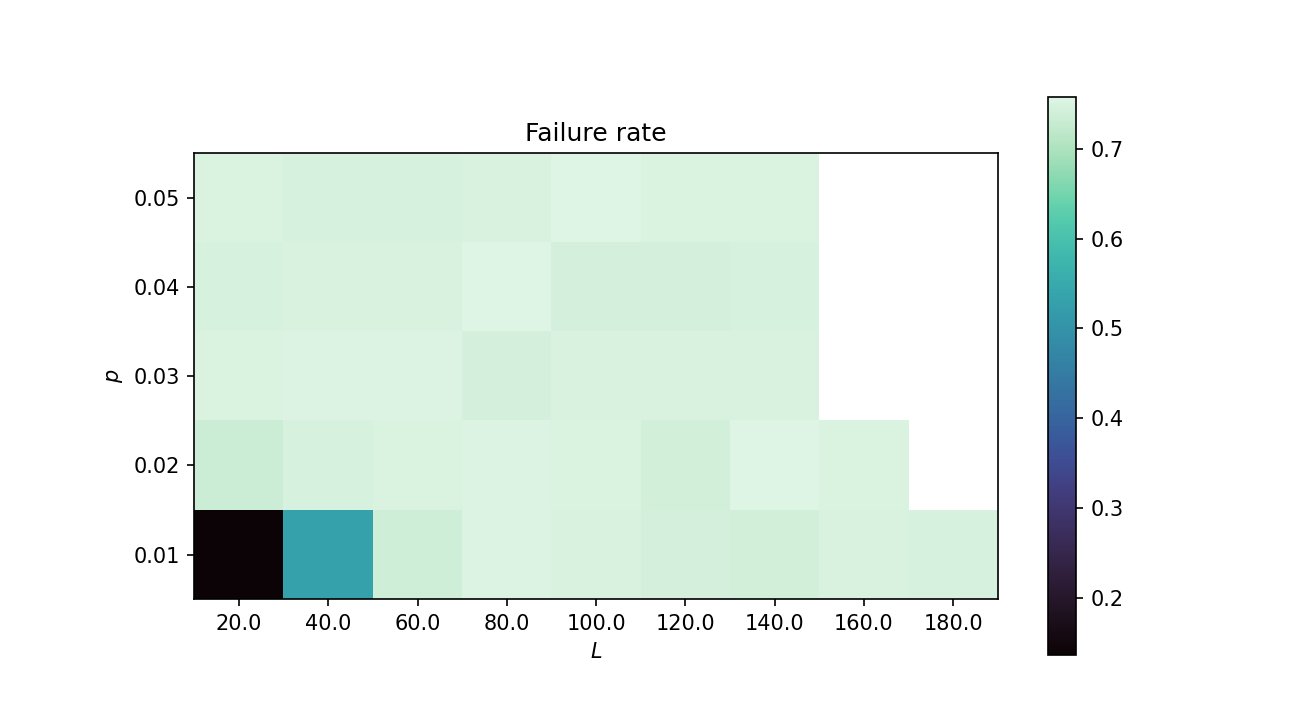

In [33]:
plt.matshow(fail_rate.T, cmap = mako, origin = 'lower')
plt.colorbar()
plt.title("Failure rate")
plt.xlabel("$L$")
plt.ylabel("$p$")
plt.xticks(range(9), np.linspace(20, 180, 9))
plt.yticks(range(5), np.linspace(0.01, 0.05, 5))
ax = plt.gca()
ax.xaxis.tick_bottom()
plt.savefig("plots/run3_fail_heatmap.png")
plt.show()

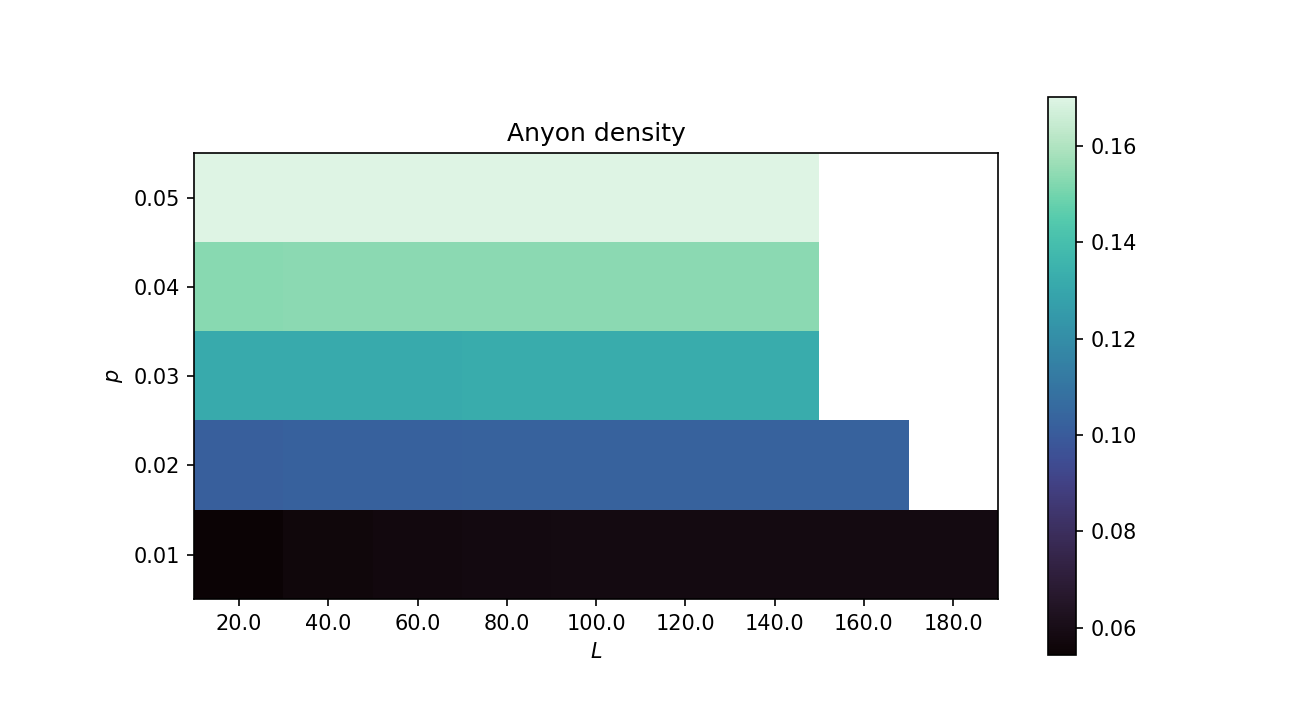

In [34]:
plt.matshow(density.T, cmap = mako, origin = 'lower')
plt.colorbar()
plt.title("Anyon density")
plt.xlabel("$L$")
plt.ylabel("$p$")
plt.xticks(range(9), np.linspace(20, 180, 9))
plt.yticks(range(5), np.linspace(0.01, 0.05, 5))
ax = plt.gca()
ax.xaxis.tick_bottom()
plt.savefig("plots/run3_density_heatmap.png")
plt.show()

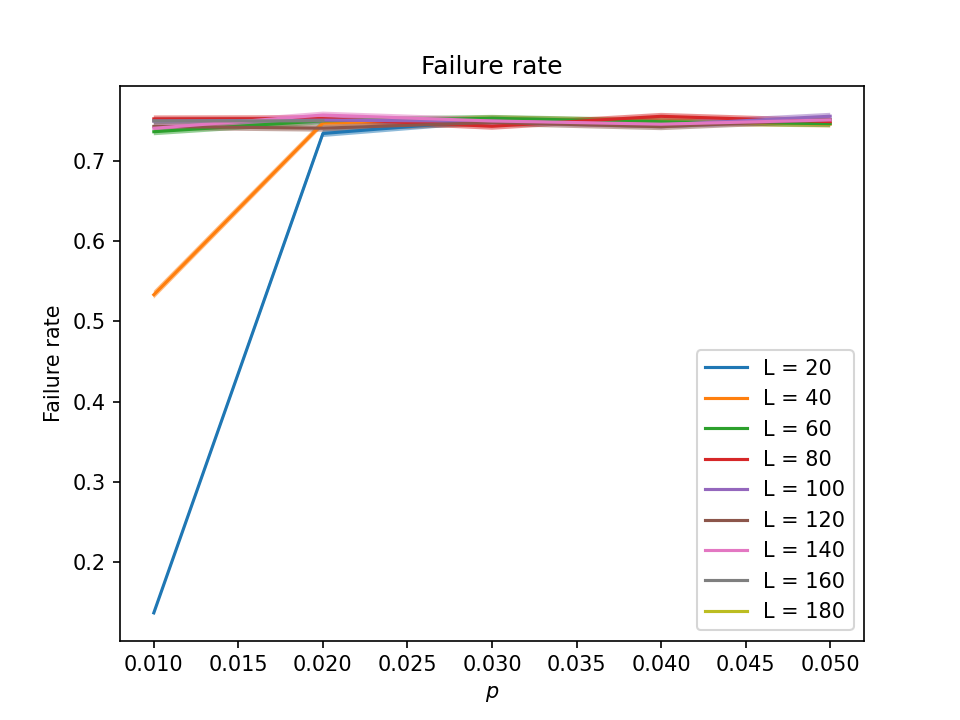

In [40]:
for i in range(9):
    L = 20*(i+1)
    plt.plot(np.linspace(0.01, 0.05, 5), fail_rate[i], label = f"L = {L}")
    error = np.sqrt(fail_rate[i] * (1 - fail_rate[i])) / 100
    plt.fill_between(np.linspace(0.01, 0.05, 5), fail_rate[i]-error, fail_rate[i]+error, alpha = 0.5)
plt.legend()
plt.title("Failure rate")
plt.xlabel("$p$")
plt.ylabel("Failure rate")
plt.savefig("plots/run3_fail_linear.png")
plt.show()

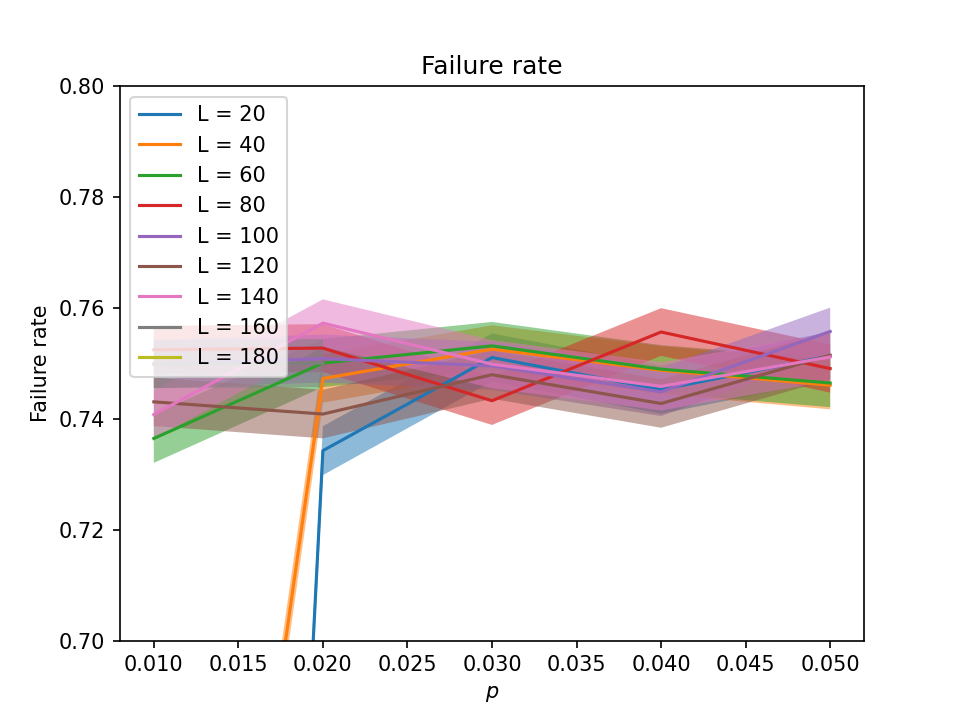

In [42]:
for i in range(9):
    L = 20*(i+1)
    plt.plot(np.linspace(0.01, 0.05, 5), fail_rate[i], label = f"L = {L}")
    error = np.sqrt(fail_rate[i] * (1 - fail_rate[i])) / 100
    plt.fill_between(np.linspace(0.01, 0.05, 5), fail_rate[i]-error, fail_rate[i]+error, alpha = 0.5)
plt.legend()
plt.title("Failure rate")
plt.xlabel("$p$")
plt.ylabel("Failure rate")
plt.ylim(0.7, 0.8)
plt.savefig("plots/run3_fail_zoomed.png")
plt.show()

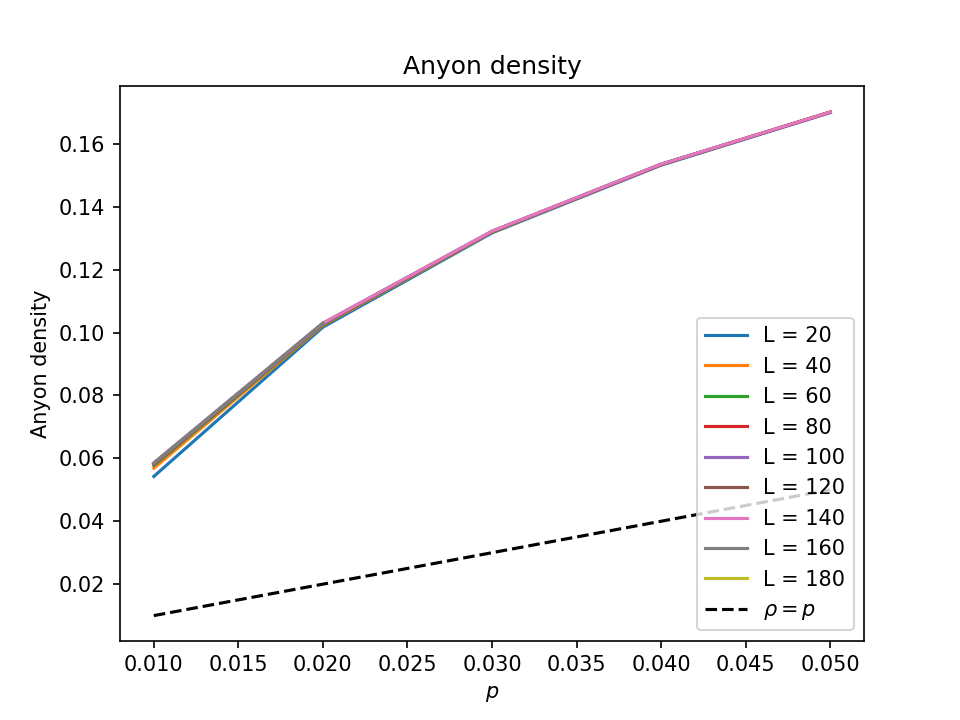

In [47]:
for i in range(9):
    L = 20*(i+1)
    plt.plot(np.linspace(0.01, 0.05, 5), density[i], label = f"L = {L}")
    error = np.sqrt(density[i] * (1 - density[i])) / (100 * L)
    plt.fill_between(np.linspace(0.01, 0.05, 5), density[i]-error, density[i]+error, alpha = 0.5)
plt.title("Anyon density")
plt.xlabel("$p$")
plt.ylabel("Anyon density")
plt.plot([0.01, 0.05], [0.01, 0.05], 'k--', label = r"$\rho=p$")
plt.legend(loc = 'lower right')
plt.savefig("plots/run3_density_linear.png")
plt.show()